<a href="https://colab.research.google.com/github/GeetanjaliWadhwa/LGMVIP-DS-GlobalTerrorism/blob/main/Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis - Terrorism**

TASK 1: INTERMEDIATE LEVEL

by Geetanjali


**Tasks:**

● Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

● As a security/defense analyst, try to find out the hot zone of terrorism.

● What all security issues and insights you can derive by EDA?

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Terrorism.csv',encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
dataset.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
dataset.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,...,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,Houses were damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),21.0,Government Building/Facility/Office,Forest Department Manipur,Office,...,NaN,NaN,A thrown grenade was used in the attack.,0.0,0.0,0.0,0.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,1.0,0,NaN,12/31/2017: An explosive device was discovered...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,20,Unknown,NaN,NaN,Unknown,Unknown,...,NaN,NaN,An explosive device containing a detonating co...,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [6]:
dataset.shape

(181691, 135)

In [7]:
dataset.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [9]:
dataset.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [11]:
dataset.value_counts #returns a series containing count of unique rows

<bound method DataFrame.value_counts of              eventid  iyear  imonth  iday  ... INT_IDEO  INT_MISC INT_ANY  related
0       197000000001   1970       7     2  ...        0         0       0      NaN
1       197000000002   1970       0     0  ...        1         1       1      NaN
2       197001000001   1970       1     0  ...       -9         1       1      NaN
3       197001000002   1970       1     0  ...       -9         1       1      NaN
4       197001000003   1970       1     0  ...       -9         1       1      NaN
...              ...    ...     ...   ...  ...      ...       ...     ...      ...
181686  201712310022   2017      12    31  ...        0         0       0      NaN
181687  201712310029   2017      12    31  ...       -9         1       1      NaN
181688  201712310030   2017      12    31  ...        0         0       0      NaN
181689  201712310031   2017      12    31  ...       -9         0      -9      NaN
181690  201712310032   2017      12    31  ... 

In [12]:
dataset.isnull().sum() #calculate number of null values in each column

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [13]:
dataset.isnull().any()

eventid       False
iyear         False
imonth        False
iday          False
approxdate     True
              ...  
INT_LOG       False
INT_IDEO      False
INT_MISC      False
INT_ANY       False
related        True
Length: 135, dtype: bool

In [14]:
dataset.count() #count number of non null values

eventid       181691
iyear         181691
imonth        181691
iday          181691
approxdate      9239
               ...  
INT_LOG       181691
INT_IDEO      181691
INT_MISC      181691
INT_ANY       181691
related        25038
Length: 135, dtype: int64

In [15]:
dataset.country_txt.value_counts()  #returns a series containing count of unique values (applied on a column/ series)

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
New Hebrides               1
Wallis and Futuna          1
St. Lucia                  1
Antigua and Barbuda        1
International              1
Name: country_txt, Length: 205, dtype: int64

In [19]:
corelation=dataset.corr()
print(corelation)

            eventid     iyear    imonth  ...  INT_IDEO  INT_MISC   INT_ANY
eventid    1.000000  0.999996  0.002706  ... -0.133252 -0.077852 -0.175605
iyear      0.999996  1.000000  0.000139  ... -0.133253 -0.077847 -0.175596
imonth     0.002706  0.000139  1.000000  ... -0.002034 -0.002554 -0.006336
iday       0.018336  0.018254  0.005497  ... -0.001621 -0.002027 -0.001199
extended   0.091761  0.091754 -0.000468  ...  0.075147  0.027335  0.080767
...             ...       ...       ...  ...       ...       ...       ...
nreleased -0.181612 -0.181556 -0.011535  ...  0.040947  0.085055  0.064759
INT_LOG   -0.143600 -0.143601 -0.002302  ...  0.996211  0.052537  0.891051
INT_IDEO  -0.133252 -0.133253 -0.002034  ...  1.000000  0.082014  0.893811
INT_MISC  -0.077852 -0.077847 -0.002554  ...  0.082014  1.000000  0.252193
INT_ANY   -0.175605 -0.175596 -0.006336  ...  0.893811  0.252193  1.000000

[77 rows x 77 columns]


# **VISUALIZATION OF DATA**

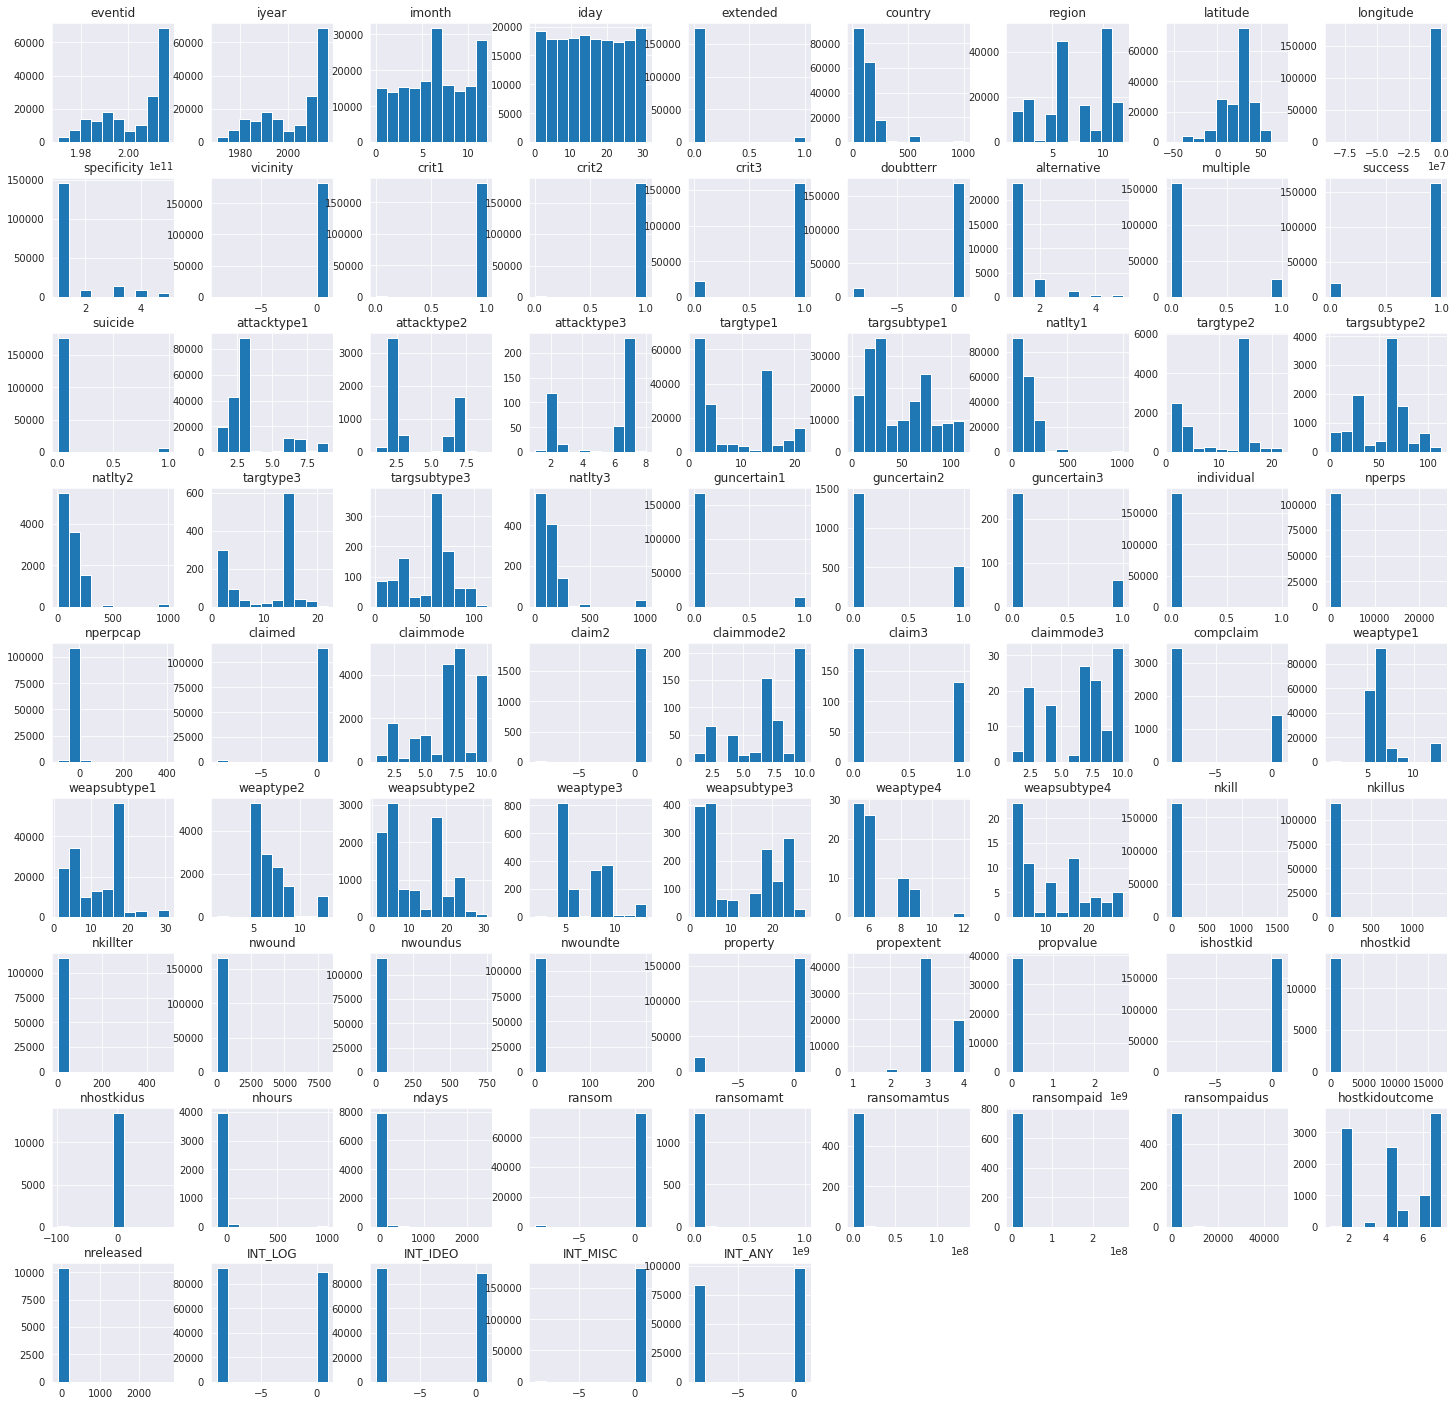

In [20]:
dataset.hist(figsize=(25,25))
plt.show()

In [16]:
countries_with_most_terrorism = dataset.country_txt.value_counts().head(10)
countries_with_most_terrorism.index

Index(['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia', 'Philippines',
       'Peru', 'El Salvador', 'United Kingdom', 'Turkey'],
      dtype='object')

In [17]:
countries= list(countries_with_most_terrorism.index)
print("Countries with most terrorism are:\n", countries)

Countries with most terrorism are:
 ['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia', 'Philippines', 'Peru', 'El Salvador', 'United Kingdom', 'Turkey']


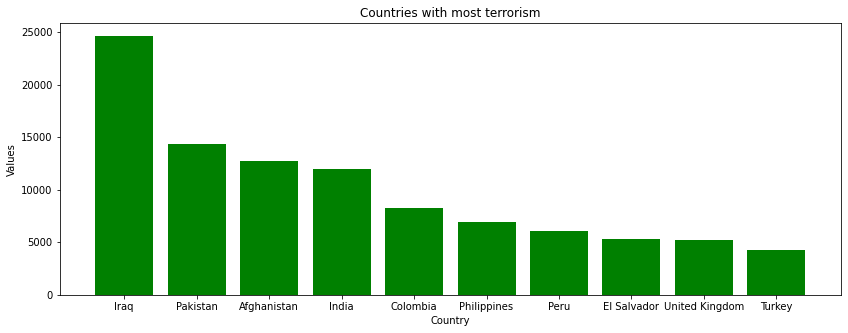

In [18]:
fig, ax = plt.subplots(figsize=(14,5))
ax.bar(countries_with_most_terrorism.index,countries_with_most_terrorism.values,color='g')
plt.title('Countries with most terrorism')
plt.xlabel('Country')
plt.ylabel('Values')
plt.show()

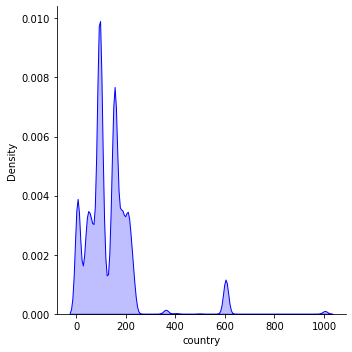

In [19]:
sb.displot(dataset,x='country',kind='kde',fill='tree',palette='colorblind',color='b')
sb.set_style("darkgrid")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


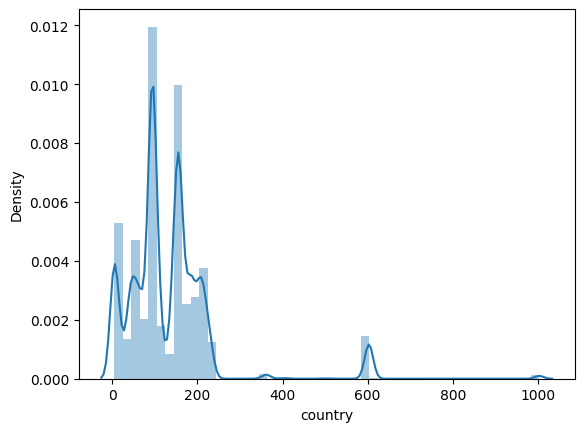

In [51]:
sb.distplot(a=dataset['country'])

In [21]:
dataset.iyear.value_counts().head(10)

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: iyear, dtype: int64

In [39]:
years= list((dataset.iyear.value_counts().head(10)).index)
print("Years with most attacks in decreasing order:\n", years)

Years with most attacks in decreasing order:
 [2014, 2015, 2016, 2013, 2017, 2012, 2011, 1992, 2010, 2008]


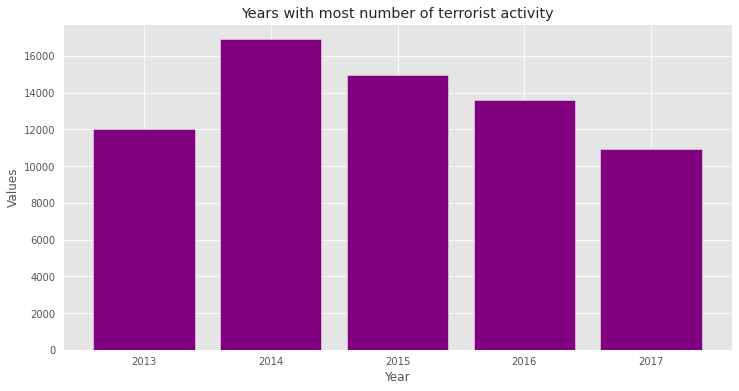

In [24]:
year = dataset.iyear.value_counts().head(5)
plt.figure(figsize=(12,6))
plt.bar(year.index,year.values,color='purple')
plt.title("Years with most number of terrorist activity")
plt.xlabel("Year")
plt.ylabel("Values")
plt.show()
plt.style.use("ggplot")

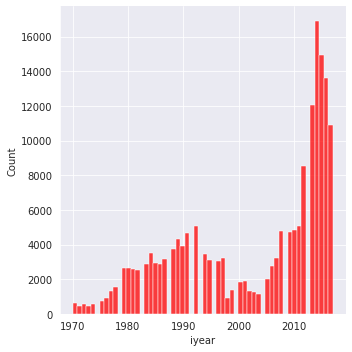

In [23]:
sb.displot(dataset,x='iyear',kind='hist',palette='colorblind',color='r')
plt.style.use("ggplot")

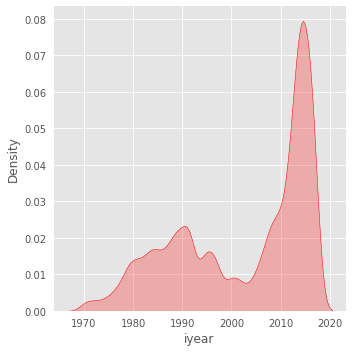

In [25]:
sb.displot(dataset,x='iyear',kind='kde',fill='tree',palette='colorblind',color='red')

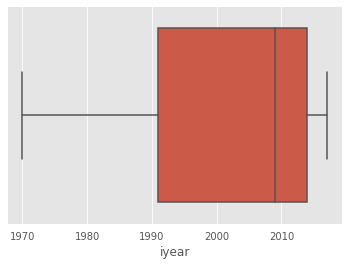

In [26]:
sb.boxplot(x=dataset['iyear'])

<Figure size 200x200 with 0 Axes>

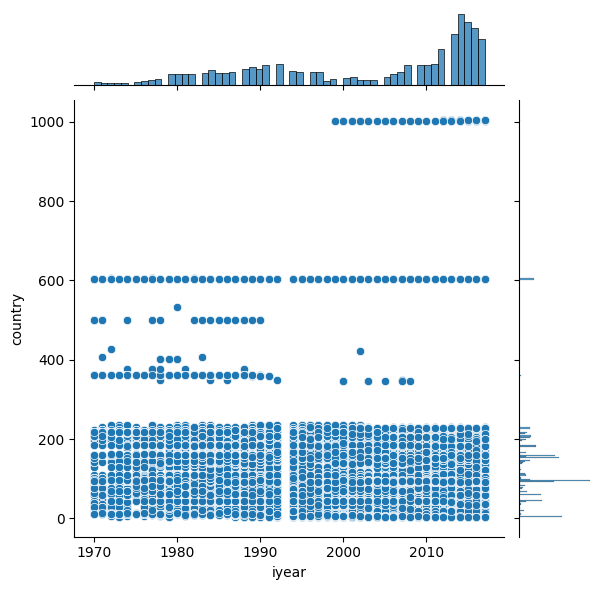

<Figure size 200x200 with 0 Axes>

In [50]:
sb.jointplot(x=dataset['iyear'],y=dataset['country'])
plt.figure(figsize=(2,2))

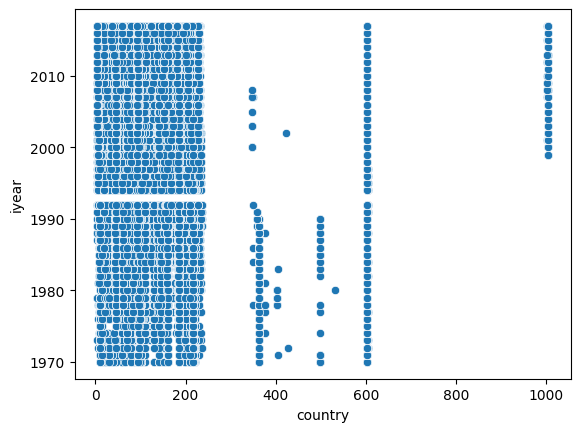

In [37]:
sb.scatterplot(x=dataset['country'],y=dataset['iyear'])

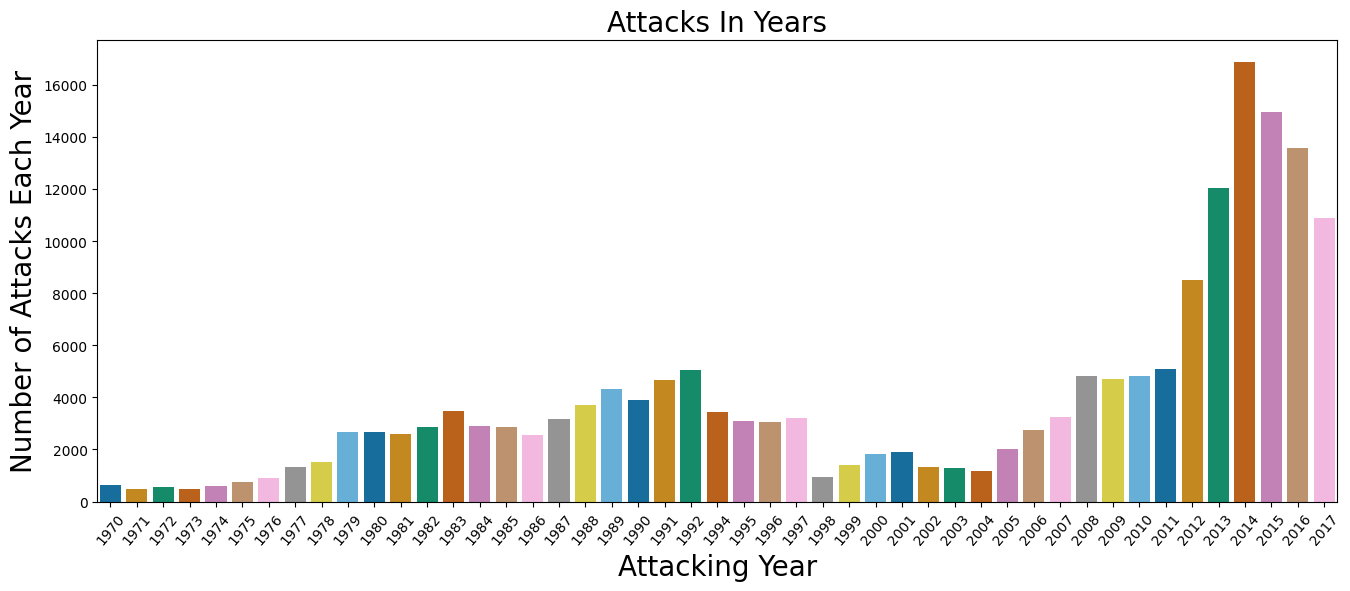

In [39]:
year = dataset['iyear'].unique()
years_count = dataset['iyear'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (16,6))
sb.barplot(x = year,
           y = years_count,
           palette = "colorblind")
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',fontsize=20)
plt.title('Attacks In Years',fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


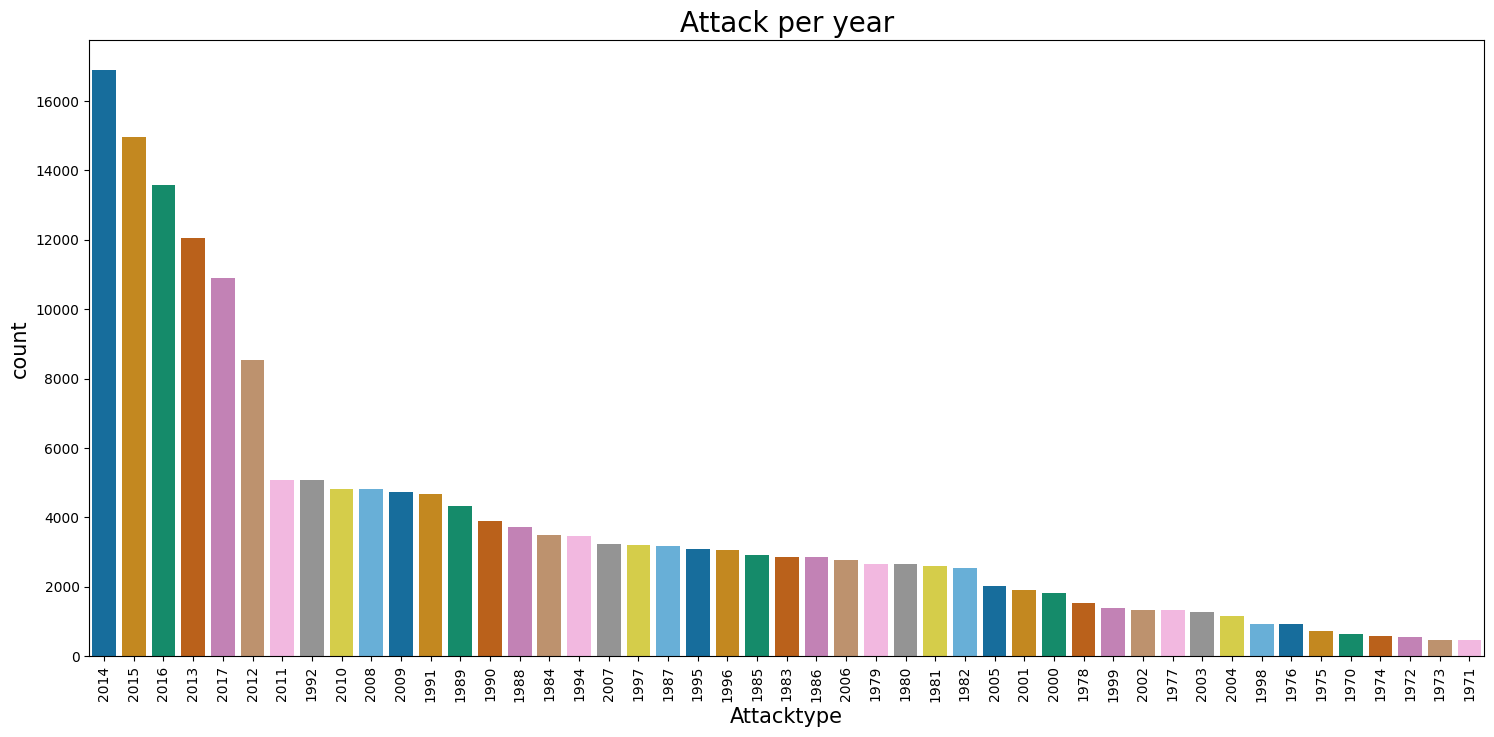

In [40]:
plt.subplots(figsize=(18,8))
sb.countplot(dataset["iyear"],order=dataset['iyear'].value_counts().index,palette="colorblind")
plt.xticks(rotation=90)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Attack per year",fontsize=20)
plt.show()

In [55]:
dataset.imonth.value_counts().head(10)

5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
Name: imonth, dtype: int64

In [57]:
month_with_most_terrorism = dataset.imonth.value_counts().head(10)
months = list(month_with_most_terrorism.index)
print("Months with most terrorism:\n", months)

Months with most terrorism:
 [5, 7, 8, 10, 6, 3, 4, 1, 11, 9]


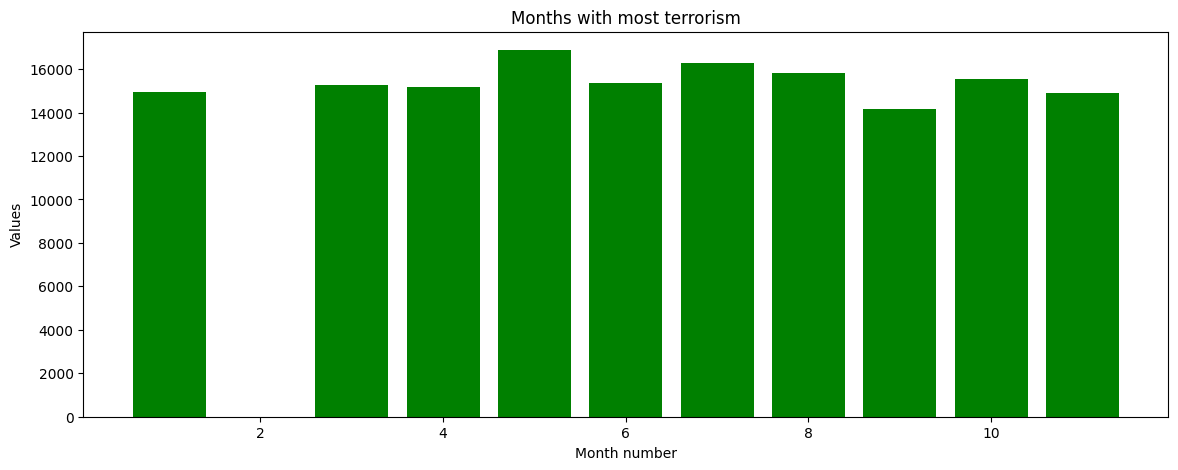

In [58]:
fig, ax = plt.subplots(figsize=(14,5))
ax.bar(month_with_most_terrorism.index,month_with_most_terrorism.values,color='g')
plt.title('Months with most terrorism')
plt.xlabel('Month number')
plt.ylabel('Values')
plt.show()

In [30]:
dataset.targtype1_txt.value_counts().head(10)

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Name: targtype1_txt, dtype: int64

In [28]:
targets_with_max_attacks= dataset.targtype1_txt.value_counts().head(10)
targetset= list(targets_with_max_attacks.index)
print("Targets with maximum attacks:\n", targetset)

Targets with maximum attacks:
 ['Private Citizens & Property', 'Military', 'Police', 'Government (General)', 'Business', 'Transportation', 'Utilities', 'Unknown', 'Religious Figures/Institutions', 'Educational Institution']


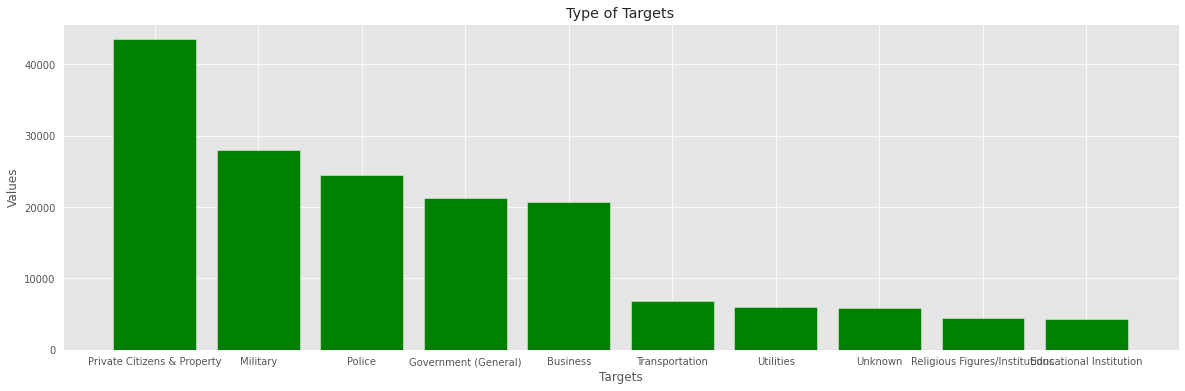

In [31]:
target = dataset['targtype1_txt'].value_counts().head(10)
fig,ax = plt.subplots(figsize=(20,6))
ax.bar(target.index,target.values,color='g')
plt.title('Type of Targets')
plt.xlabel("Targets")
plt.ylabel("Values")
plt.show()

In [32]:
dataset['attacktype1_txt'].value_counts().head(10)

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

In [38]:
attack_types = dataset.attacktype1_txt.value_counts().head(10)
attack_type= list(attack_types.index)
print("Types of attacks:\n", attack_type)

Types of attacks:
 ['Bombing/Explosion', 'Armed Assault', 'Assassination', 'Hostage Taking (Kidnapping)', 'Facility/Infrastructure Attack', 'Unknown', 'Unarmed Assault', 'Hostage Taking (Barricade Incident)', 'Hijacking']


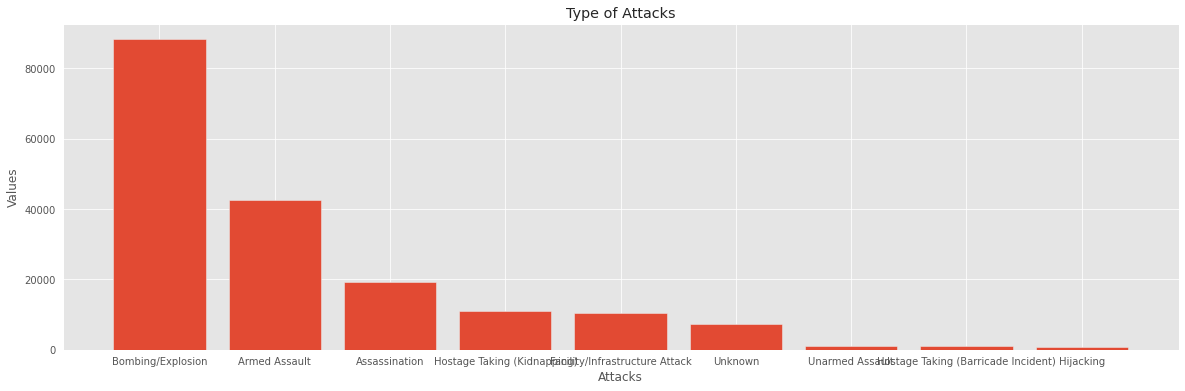

In [40]:
fig,ax=plt.subplots(figsize=(20,6))
ax.bar(attack_types.index, attack_types.values)
plt.title('Type of Attacks')
plt.xlabel("Attacks")
plt.ylabel("Values")
plt.show()

Most used weapons:
 ['Explosives', 'Firearms', 'Unknown', 'Incendiary', 'Melee', 'Chemical']


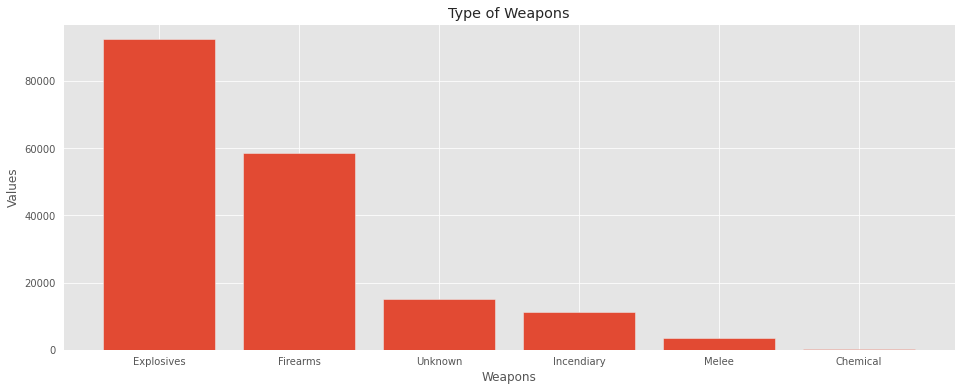

In [44]:
weapon_type = dataset['weaptype1_txt'].value_counts().head(6)
weapons= list(weapon_type.index)
print("Most used weapons:\n", weapons)
fig,ax = plt.subplots(figsize=(16,6))
ax.bar(weapon_type.index,weapon_type.values)
plt.title('Type of Weapons')
plt.xlabel("Weapons")
plt.ylabel("Values")
plt.show()

In [53]:
dataset[dataset.targtype1_txt=='Religious Figures/Institutions'].country_txt.value_counts().head(10)

Iraq             661
Pakistan         545
Afghanistan      232
Nigeria          226
India            214
United States    148
Chile            143
Philippines      119
Indonesia        112
Colombia         110
Name: country_txt, dtype: int64

Countries with most terorrism on religious figures/Intsitutions:
 ['Iraq', 'Pakistan', 'Afghanistan', 'Nigeria', 'India']


<function matplotlib.pyplot.show>

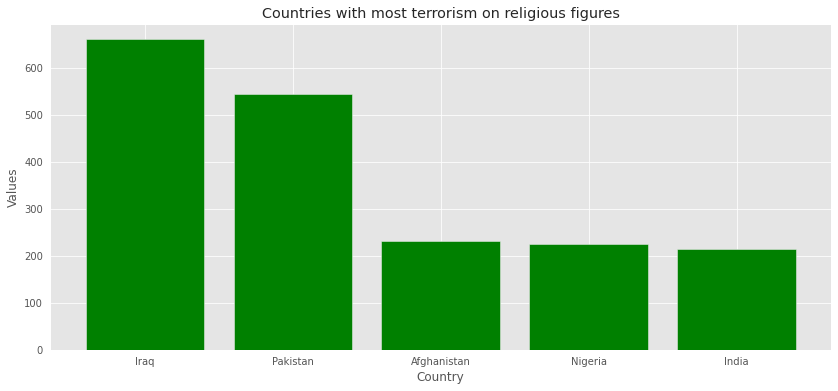

In [47]:
religious_target = dataset[dataset['targtype1_txt']=='Religious Figures/Institutions']
Rtargetset= religious_target.country_txt.value_counts().head()
listoftarget=list(Rtargetset.index)
print("Countries with most terorrism on religious figures/Intsitutions:\n",listoftarget)
plt.figure(figsize=(14,6))
plt.bar(Rtargetset.index,Rtargetset.values,color='g')
plt.title("Countries with most terrorism on religious figures")
plt.xlabel("Country")
plt.ylabel("Values")
plt.show

Cities with most terrorism:
 ['Unknown', 'Baghdad', 'Karachi', 'Lima', 'Mosul', 'Belfast', 'Santiago', 'Mogadishu', 'San Salvador', 'Istanbul']


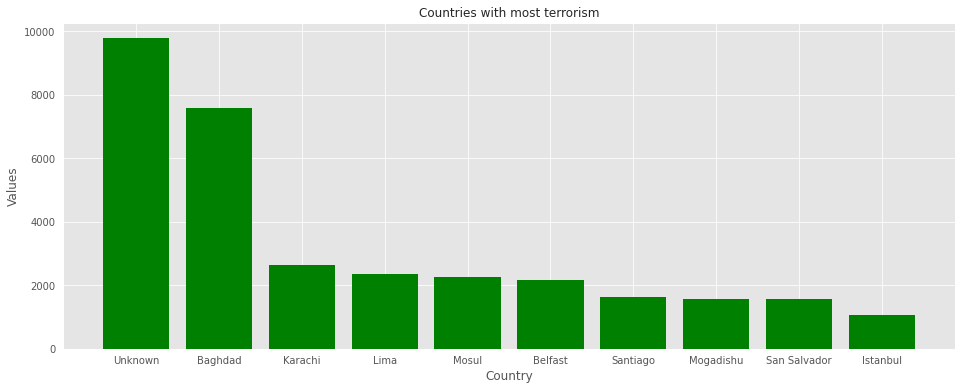

In [49]:
cities_with_most_terrorism = dataset.city.value_counts().head(10)
cities = list(cities_with_most_terrorism.index)
print("Cities with most terrorism:\n",cities)
fig,ax = plt.subplots(figsize=(16,6))
plt.style.use('default')
ax.bar(cities_with_most_terrorism.index,cities_with_most_terrorism.values,color='g')
plt.title('Countries with most terrorism')
plt.xlabel('Country')
plt.ylabel('Values')
plt.show()

**CONCLUSIONS:**

1. Country with most attacks: Iraq

2. Year with most attacks: 2014

3. Month with most attacks: 5

4. Mostly targetted sections: Private citizens and Property

5. Mostly used attack type: Bombing/Explosion

6. Weapon used maximum times during the attacks: Explosives

7. Country with maximum attacks on Religious figures/ institutions: Iraq

8. City with most terrorism: Baghdad







